<a href="https://colab.research.google.com/github/Saicharitha26/codectechnologies/blob/main/Untitled27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving athlete_events.csv.zip to athlete_events.csv.zip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv('athlete_events.csv.zip')
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


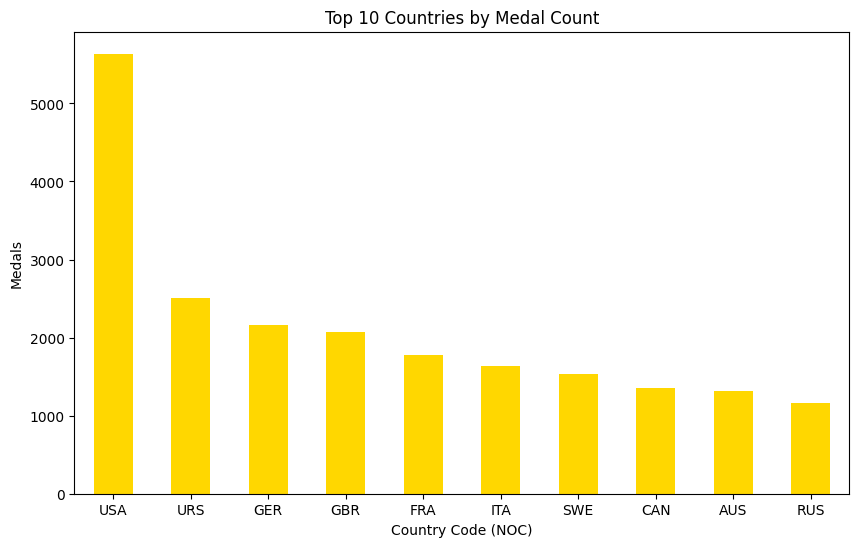

In [5]:
medals_df = df[df['Medal'].notna()]
top_countries = medals_df['NOC'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.ylabel("Medals")
plt.xlabel("Country Code (NOC)")
plt.xticks(rotation=0)
plt.show()


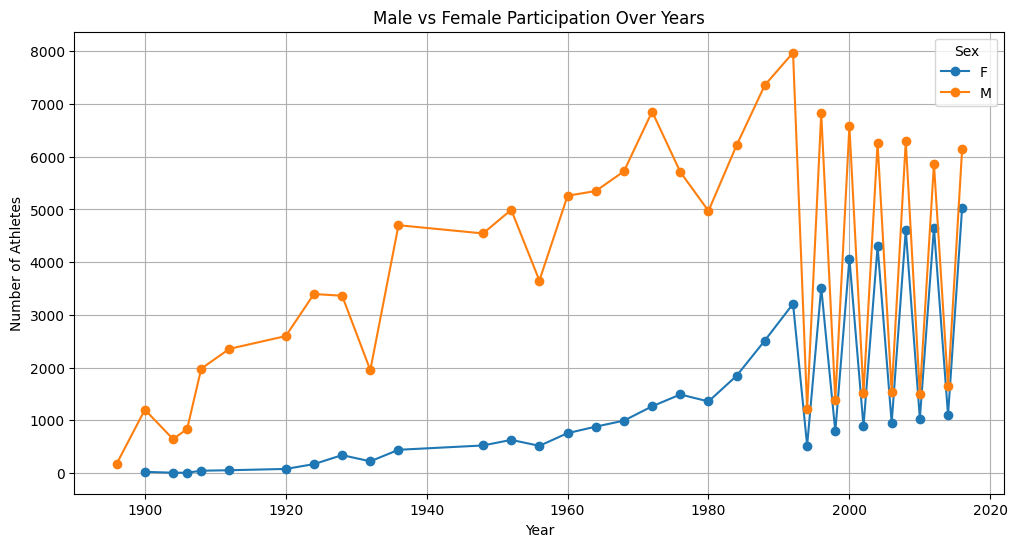

In [6]:
gender_df = df.groupby(['Year', 'Sex'])['ID'].nunique().unstack()

gender_df.plot(figsize=(12,6), marker='o')
plt.title("Male vs Female Participation Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.grid(True)
plt.show()


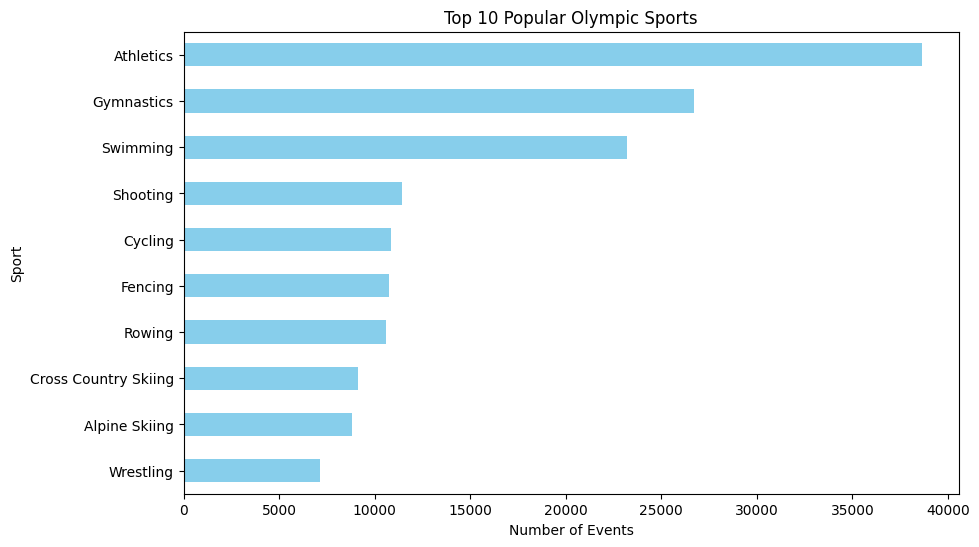

In [7]:
plt.figure(figsize=(10,6))
df['Sport'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Popular Olympic Sports")
plt.xlabel("Number of Events")
plt.gca().invert_yaxis()
plt.show()


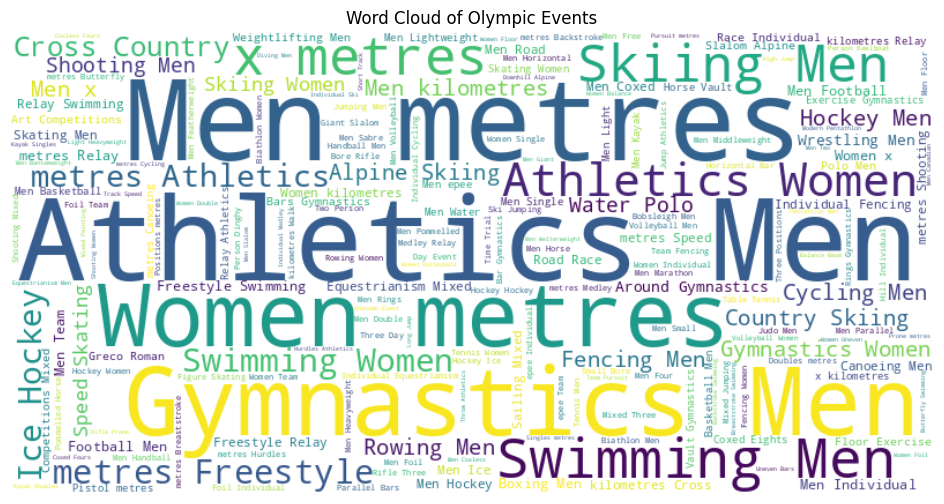

In [8]:
event_text = " ".join(df['Event'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(event_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Olympic Events")
plt.show()


Total Medals by India: 197


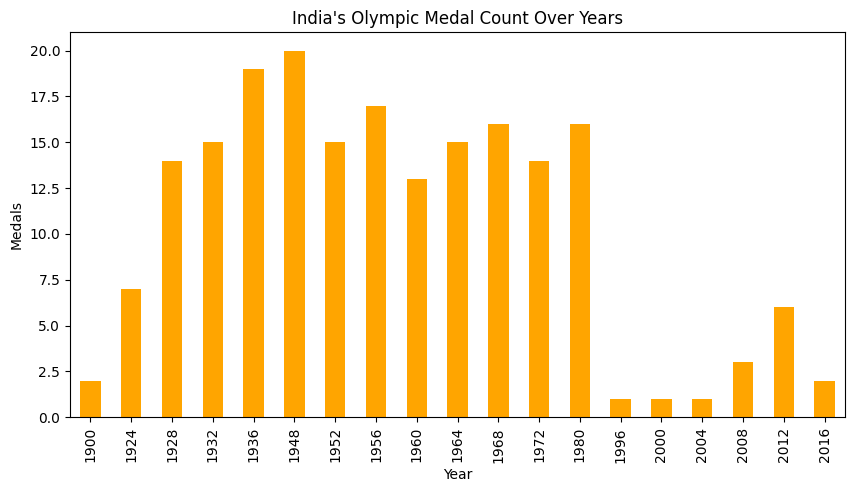

In [9]:
india_df = df[df['NOC'] == 'IND']
india_medals = india_df[india_df['Medal'].notna()]
print("Total Medals by India:", india_medals.shape[0])

plt.figure(figsize=(10,5))
india_medals['Year'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("India's Olympic Medal Count Over Years")
plt.xlabel("Year")
plt.ylabel("Medals")
plt.show()
